# <p style="text-align:center;">PROJECT - Heritage Housing Issues</p>

# I. Project outline:

## 1. Client:
- Lydia has inherited four houses in Ames, Iowa, USA, presenting an opportunity for financial gain or loss.
- Lydia, having expertise in Belgian property prices, faces uncertainty about the factors influencing house prices in Ames, Iowa.
- Lydia has found a public dataset with house prices for Ames, Iowa, providing a basis for analysis and prediction.

## 2. Business Case:
- Enhance Lydia's understanding of the Ames, Iowa housing market, accounting for factors that contribute to a house's desirability and value.

- ***Hypothesis: Only small amount of features are worth improving on the inhereted property. With an objective to increase the house sell price with a renovation, we want to provide insight into price increase upon improved specifications of the inhereted property.***

## 3. Data Science Approach:
- Implement Pandas Profiling and correlations to analyze the dataset comprehensively.
- Visualise the insights
- Develop a regression model which reliably predicts house prices in Ames, Iowa, enabling Lydia to estimate the sales price for her inherited properties and identify remodelling opportunity to increase sell price.

## 4. User interface:
- Utilize Git & GitHub for version control, ensuring effective collaboration and code management.
- Implement a Streamlit interface to provide an interactive dashboard for data exploration and predictions.

# II. Data Understanding:

In [1]:
# load necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import joblib
warnings.filterwarnings("ignore")

In [2]:
# dataset of publicly available properties
df= pd.read_csv("house_prices_records.csv")

In [3]:
# first few lines of the table
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [4]:
# column names
df.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')

***Description of columns:***

- 1stFlrSF: First Floor square feet
    - Represents the area of the first floor in square feet.

- 2ndFlrSF: Second floor square feet
    - Indicates the area of the second floor in square feet.

- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
    - Describes the number of bedrooms above ground, excluding those in the basement.

- BsmtExposure: Refers to walkout or garden level walls
    - Describes the level of exposure of the basement walls.
        - Gd: Good Exposure
        - Av: Average Exposure
        - Mn: Minimum Exposure
        - No: No Exposure
        - None: No Basement

- BsmtFinType1: Rating of basement finished area
    - Rates the quality of the finished area in the basement.
        - GLQ: Good Living Quarters
        - ALQ: Average Living Quarters
        - BLQ: Below Average Living Quarters
        - Rec: Average Rec Room
        - LwQ: Low Quality
        - Unf: Unfinished
        - None: No Basement

- BsmtFinSF1: Type 1 finished square feet
    - Represents the finished square feet of the Type 1 basement area.

- BsmtUnfSF: Unfinished square feet of basement area
    - Indicates the unfinished square feet of the basement area.

- TotalBsmtSF: Total square feet of basement area
    - Represents the total square feet of the basement area.

- GarageArea: Size of garage in square feet
    - Describes the size of the garage in square feet.

- GarageFinish: Interior finish of the garage
    - Indicates the interior finish of the garage.
        - Fin: Finished
        - RFn: Rough Finished
        - Unf: Unfinished
        - None: No Garage

- GarageYrBlt: Year garage was built
    - Represents the year the garage was built.

- GrLivArea: Above grade (ground) living area square feet
    - Describes the above-grade living area in square feet.

- KitchenQual: Kitchen quality
    - Rates the quality of the kitchen.
        - Ex: Excellent
        - Gd: Good
        - TA: Typical/Average
        - Fa: Fair
        - Po: Poor

- LotArea: Lot size in square feet
    - Represents the size of the lot in square feet.

- LotFrontage: Linear feet of street connected to property
    - Describes the linear feet of the street connected to the property.

- MasVnrArea: Masonry veneer area in square feet
    - Indicates the area of masonry veneer in square feet.

- EnclosedPorch: Enclosed porch area in square feet
    - Represents the area of the enclosed porch in square feet.

- OpenPorchSF: Open porch area in square feet
    - Indicates the area of the open porch in square feet.

- OverallCond: Rates the overall condition of the house
    - Rates the overall condition of the house on a scale from 1 (Very Poor) to 10 (Very Excellent).

- OverallQual: Rates the overall material and finish of the house
    - Rates the overall material and finish of the house on a scale from 1 (Very Poor) to 10 (Very Excellent).

- WoodDeckSF: Wood deck area in square feet
    - Describes the area of the wood deck in square feet.

- YearBuilt: Original construction date
    - Represents the original construction date of the house.

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
    - Represents the date of remodeling or additions, with the same value as the construction date if no remodeling occurred.

- SalePrice: Sale Price (our Target)
    - Represents the sale price of the house.

In [5]:
# ratio of missing values per column
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

EnclosedPorch    0.906849
WoodDeckSF       0.893836
LotFrontage      0.177397
GarageFinish     0.110959
BsmtFinType1     0.078082
BedroomAbvGr     0.067808
2ndFlrSF         0.058904
GarageYrBlt      0.055479
MasVnrArea       0.005479
1stFlrSF         0.000000
OpenPorchSF      0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
TotalBsmtSF      0.000000
OverallQual      0.000000
OverallCond      0.000000
KitchenQual      0.000000
LotArea          0.000000
GrLivArea        0.000000
GarageArea       0.000000
BsmtUnfSF        0.000000
BsmtFinSF1       0.000000
BsmtExposure     0.000000
SalePrice        0.000000
dtype: float64

<AxesSubplot:>

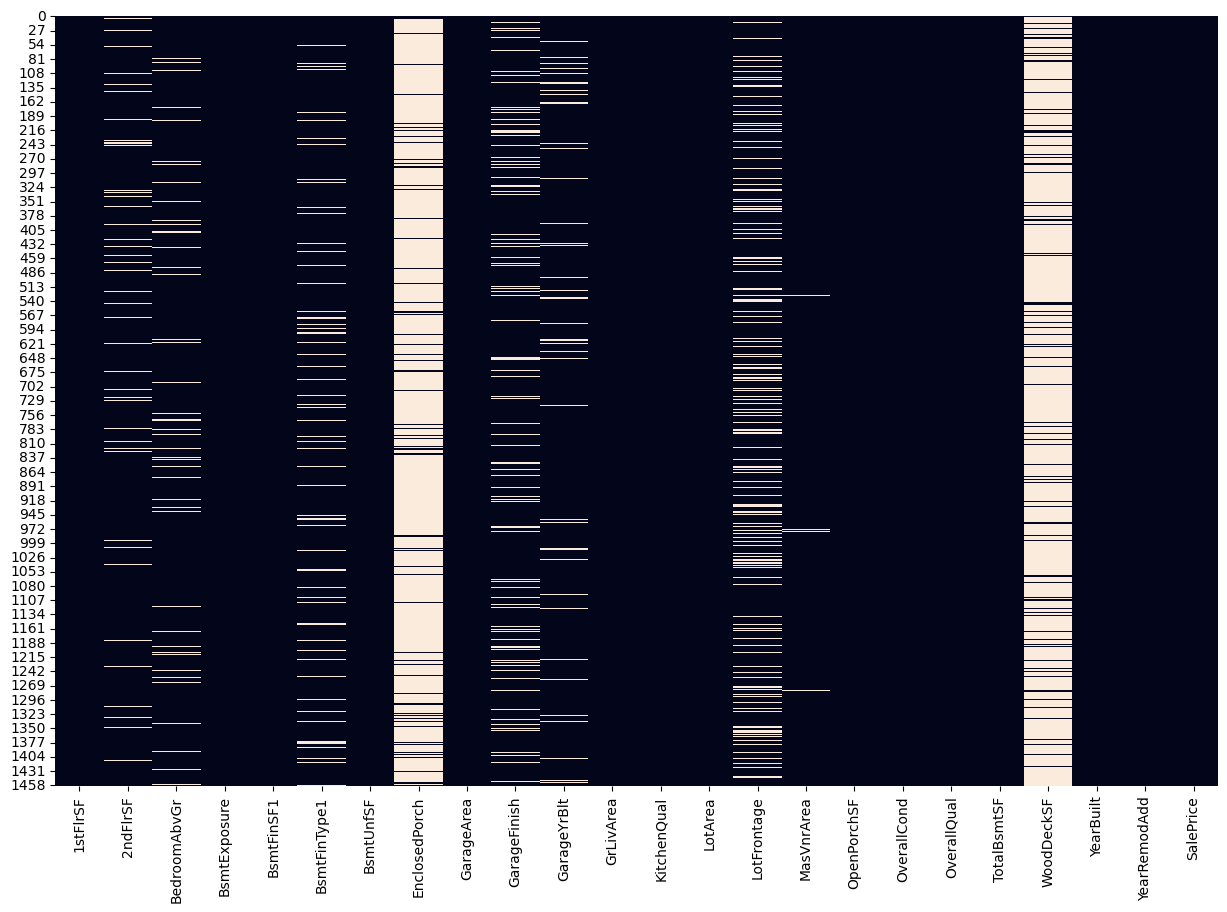

In [6]:
# visual representation of missing values
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(), cbar=False)

***Conclusion:***

- 'EnclosedPorch' and 'WoodDeckSF' should be removed due to missing values.

In [7]:
# removal of columns with large number of missing values
df.drop('EnclosedPorch',axis=1,inplace=True)
df.drop('WoodDeckSF',axis=1,inplace=True)

In [8]:
def check_dataframe(df, head=5, tail = 5):
    """ Describe size of the dataframe, datatypes for each column,
    and identify duplicate rows
    """
    print(" SHAPE ".center(82,'~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(" TYPES ".center(82,'~'))
    print(df.dtypes)
    print(' DUPLICATED VALUES '.center(83,'~'))
    print(df.duplicated().sum())

In [9]:
check_dataframe(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 1460
Columns: 22
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1stFlrSF          int64
2ndFlrSF        float64
BedroomAbvGr    float64
BsmtExposure     object
BsmtFinSF1        int64
BsmtFinType1     object
BsmtUnfSF         int64
GarageArea        int64
GarageFinish     object
GarageYrBlt     float64
GrLivArea         int64
KitchenQual      object
LotArea           int64
LotFrontage     float64
MasVnrArea      float64
OpenPorchSF       int64
OverallCond       int64
OverallQual       int64
TotalBsmtSF       int64
YearBuilt         int64
YearRemodAdd      int64
SalePrice         int64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ DUPLICATED VALUES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0


***Conlusion:***

- The dataset is composed of 1460 rows and 24 columns.
- Some variables are not in their correct types. To address this, consider converting these variables to the appropriate data types.
- There are no duplicated values.

In [10]:
# check for constant values for all rows
print(" CONSTANTS ".center(82,'~'))
constants=[]
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)
        constants.append(col)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ CONSTANTS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


***Conclusion:***

- There is no constants.

In [11]:
# numerical vs categorical variables
numerics=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtUnfSF','GarageArea','GrLivArea','LotArea','LotFrontage',
          'MasVnrArea','OpenPorchSF','TotalBsmtSF','SalePrice']
categories=['BedroomAbvGr','BsmtExposure','BsmtFinType1','GarageFinish','GarageYrBlt','KitchenQual',
            'OverallCond','OverallQual','YearBuilt','YearRemodAdd']

## 1. Univariate Analysis: 

## Categorical variables:

In [12]:
def binning(year):
    """ Binning categorical variables with year as an
    independent variable."""
    if pd.notna(year):
        year = int(year)
        if 1870 < year <= 1880:
            return "1871-1880"
        elif 1880 < year <= 1890:
            return "1881-1890"
        elif 1890 < year <= 1900:
            return "1891-1900"
        elif 1900 < year <= 1910:
            return "1901-1910"
        elif 1910 < year <= 1920:
            return "1911-1920"
        elif 1920 < year <= 1930:
            return "1921-1930"
        elif 1930 < year <= 1940:
            return "1931-1940"
        elif 1940 < year <= 1950:
            return "1941-1950"
        elif 1950 < year <= 1960:
            return "1951-1960"
        elif 1960 < year <= 1970:
            return "1961-1970"
        elif 1970 < year <= 1980:
            return "1971-1980"
        elif 1980 < year <= 1990:
            return "1981-1990"
        elif 1990 < year <= 2000:
            return "1991-2000"
        elif 2000 < year <= 2010:
            return "2001-2010"
        else:
            return "Unknown"
    else:
        return "Unknown"

In [13]:
# apply binning to relevant columns
df['GarageYrBlt'] = df['GarageYrBlt'].apply(binning)
df['YearBuilt'] = df['YearBuilt'].apply(binning)
df['YearRemodAdd'] = df['YearRemodAdd'].apply(binning)

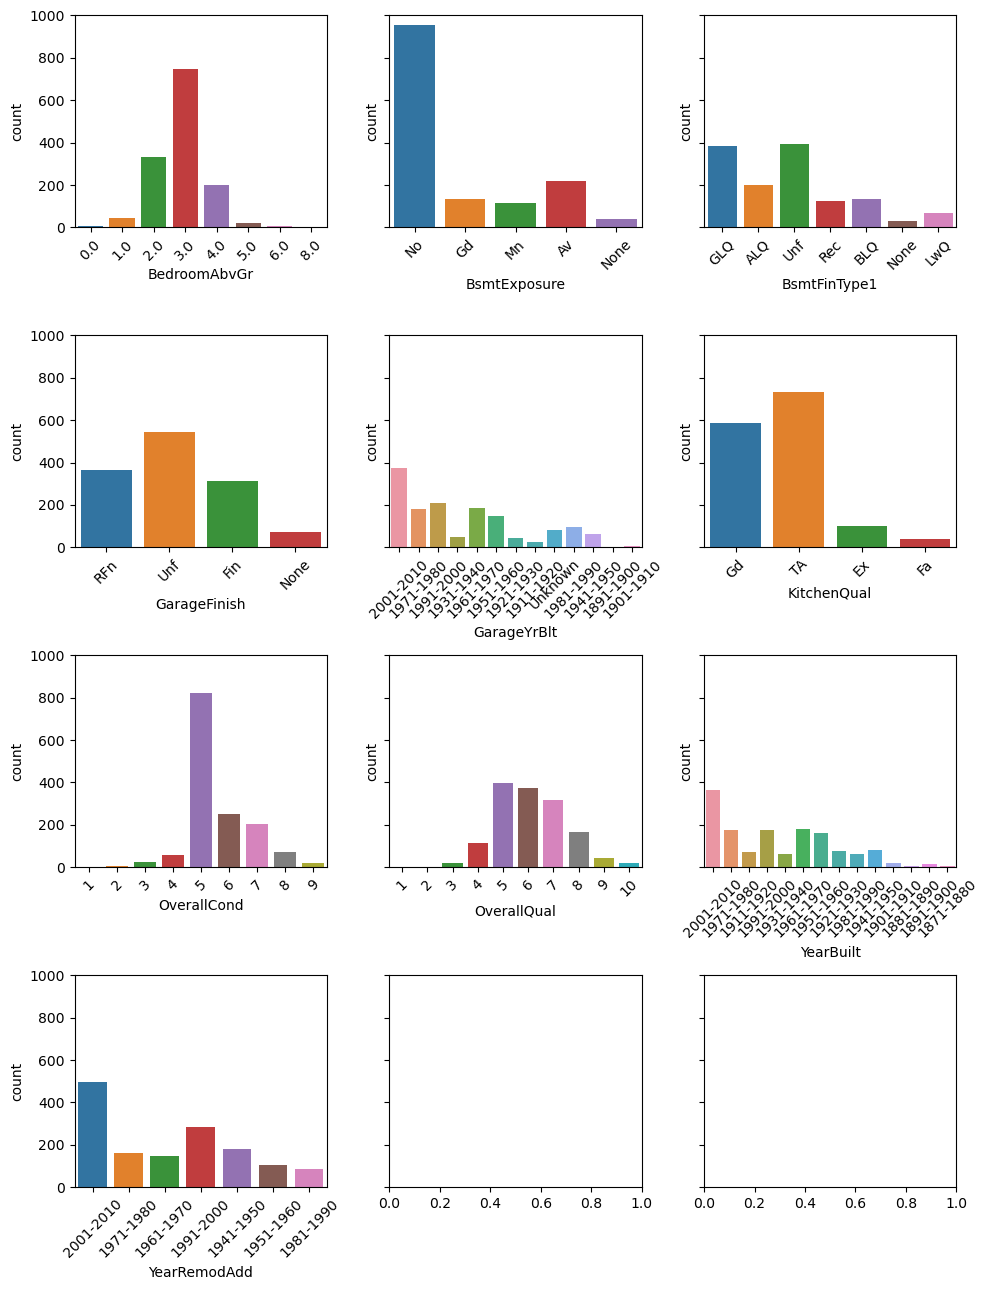

In [14]:
# plot categorical variables, value count per category
fig, ax = plt.subplots(4, 3, figsize=(10, 13), sharey=True)
for i, col in enumerate([category for category in categories if category not in constants]):
    sns.countplot(ax=ax[i//3, i%3], x=col, data=df)
    ax[i//3, i%3].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

***Conclusion:*** 

- The analysis reveals either uniform/smooth distribution of values (such as BsmtFinSF1, YearRemodAdd), or normal/lognormal distribution (OverallCond, OverallQual, BedroomAbvGr etc.) of the categorical variables.

## Numerical variables:
- histograms to reveal distribution of continuous features.
- boxplots visualize clearly mean and stadard deviation to identify potential outliers.

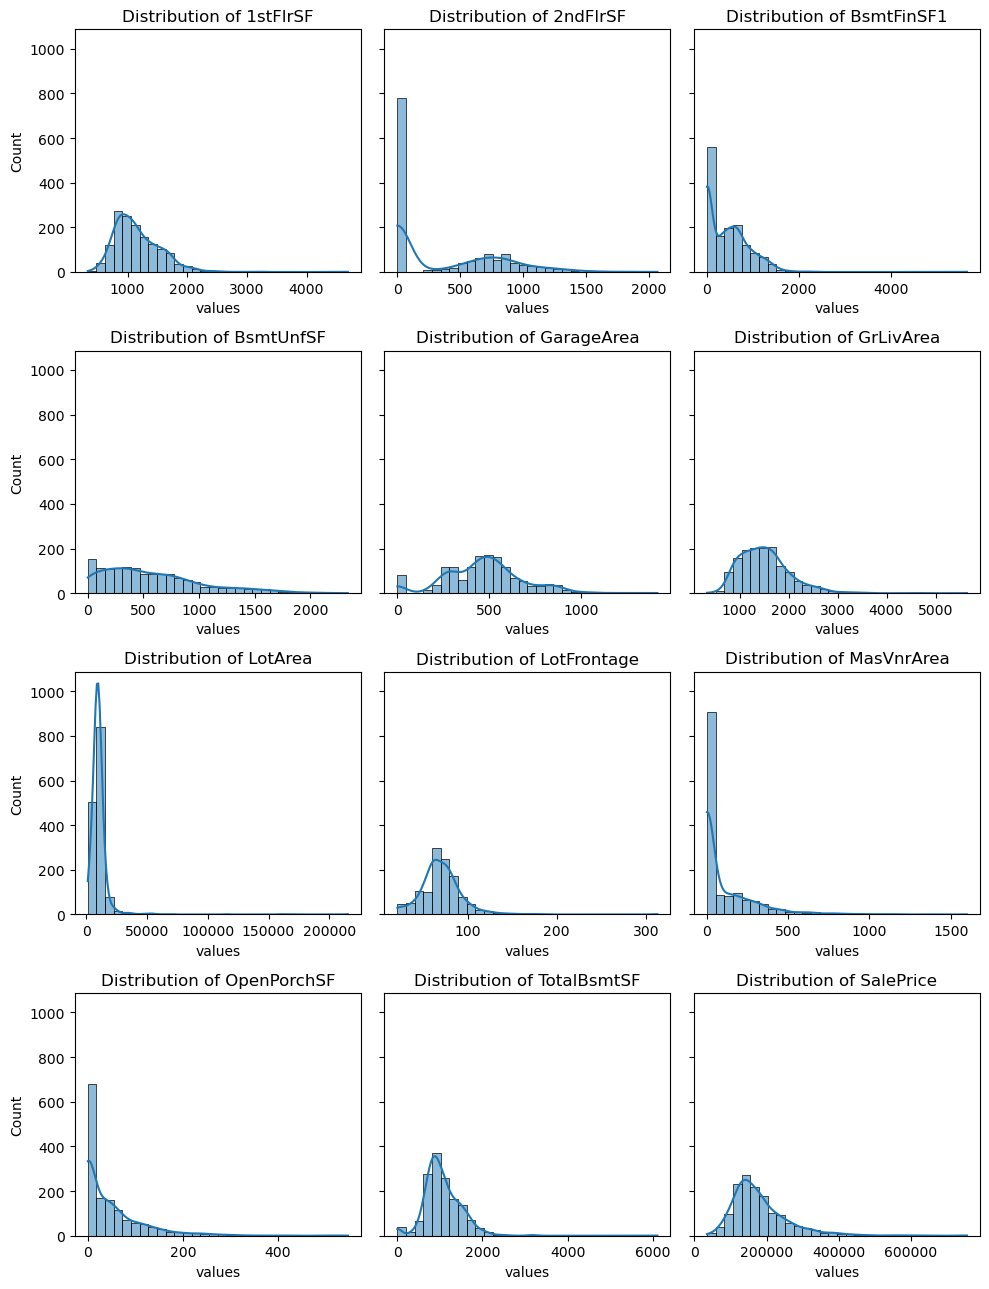

In [15]:
# histogramsper numerical feature
fig, ax = plt.subplots(4, 3, figsize=(10, 13), sharey=True)
for i, col in enumerate(numerics):
    sns.histplot(ax=ax[i//3, i%3], data=df[col], bins=30, kde=True)
    ax[i//3, i%3].set(xlabel='values', ylabel='Count', title=f'Distribution of {col}')
plt.tight_layout()
plt.show()

***Conclusion:***

- Some distributions are log-normal, while others lack a clear pattern.
- Scaling will be applied for the predictive regression model  to adapt for the varying data value ranges.

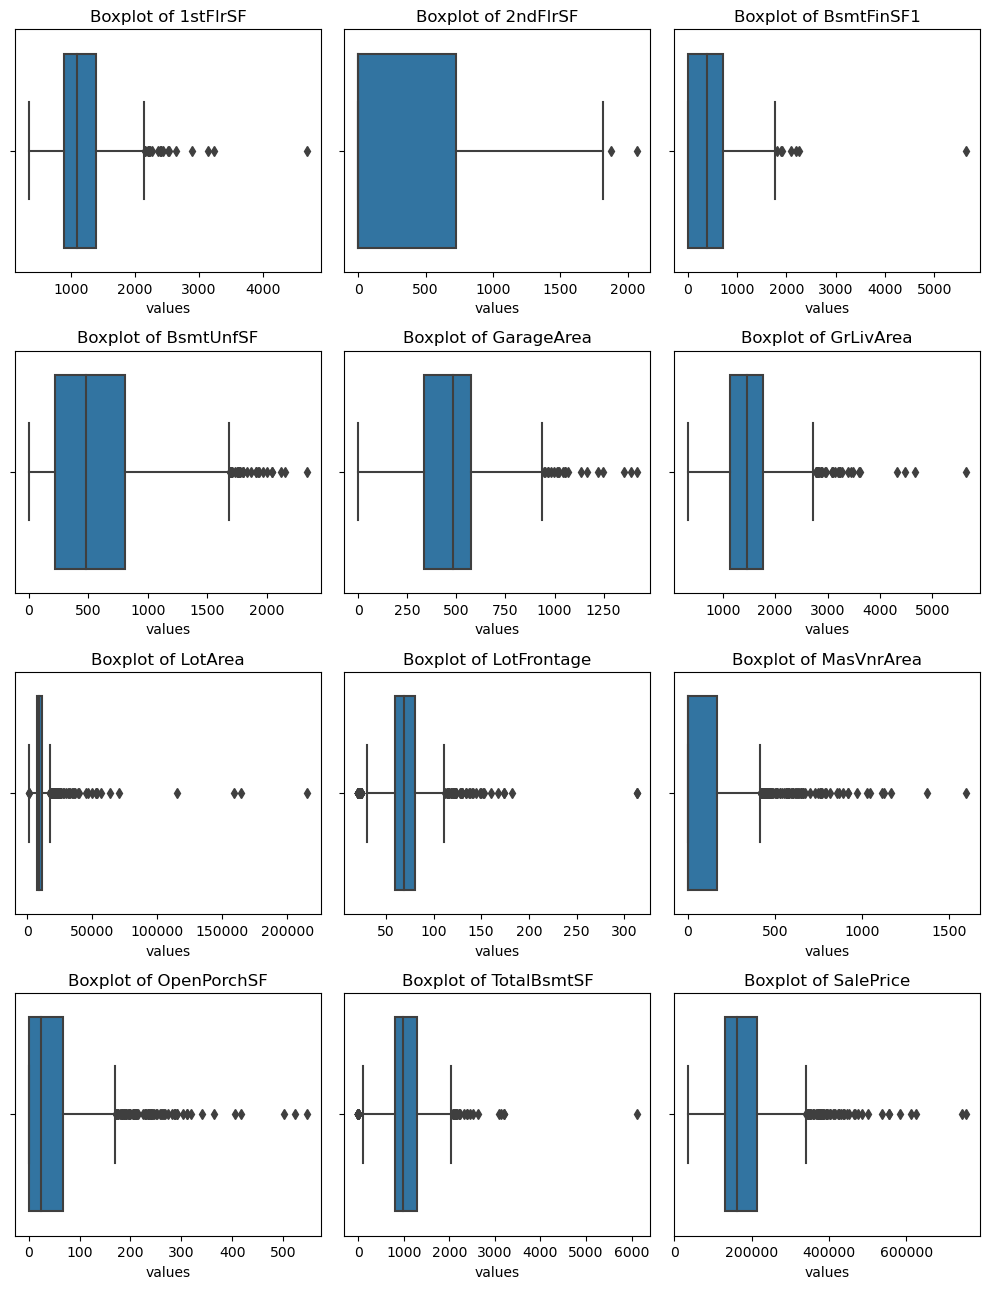

In [16]:
# boxplot per numerical variable
fig, ax = plt.subplots(4, 3, figsize=(10, 13), sharey=True)
for i, col in enumerate(numerics):
    sns.boxplot(ax=ax[i//3, i%3], x=df[col])
    ax[i//3, i%3].set(xlabel='values', title=f'Boxplot of {col}')
plt.tight_layout()
plt.show()

***Conclusion:*** 

- The analysis reveals the presence of outliers in the numerical variables.

## 2. Bi-variable Analysis: 

## Categorical vs Target

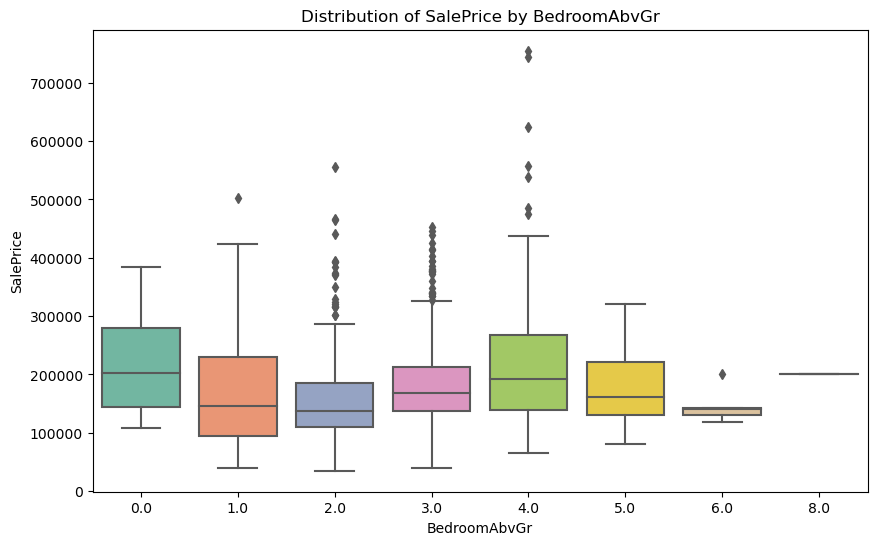

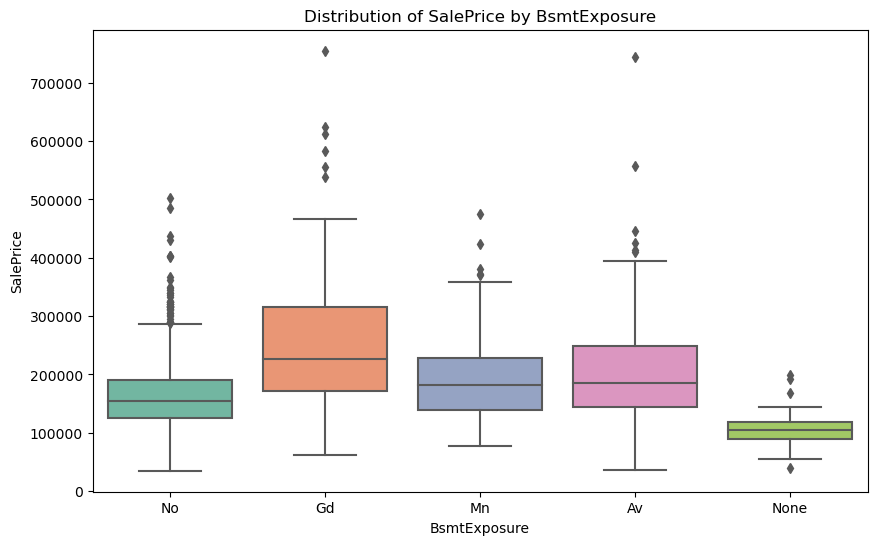

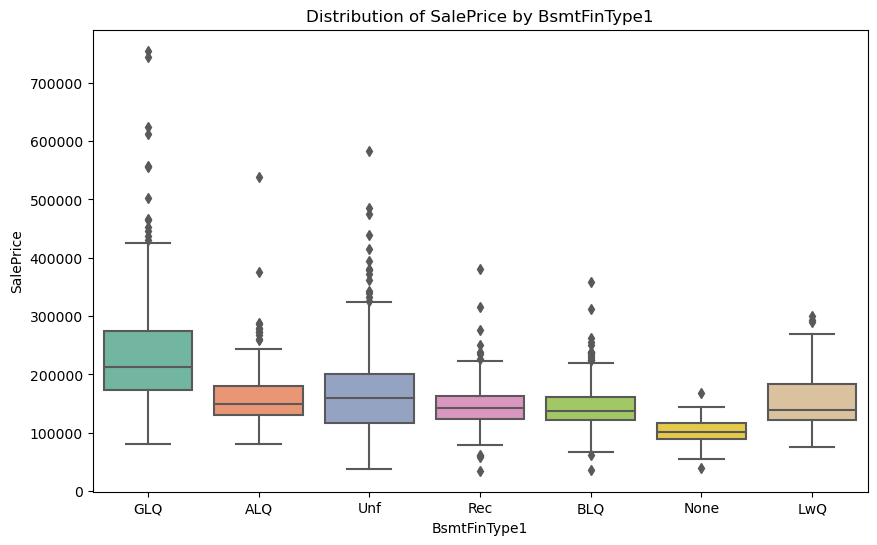

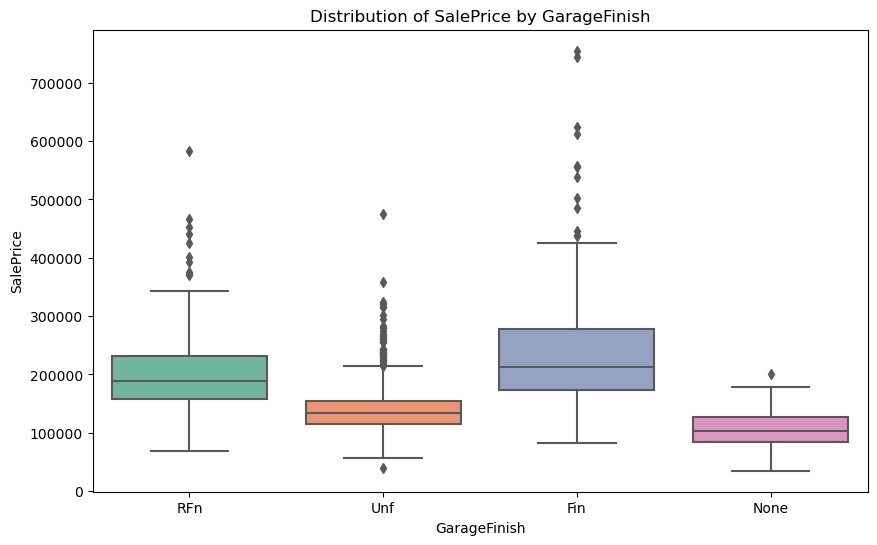

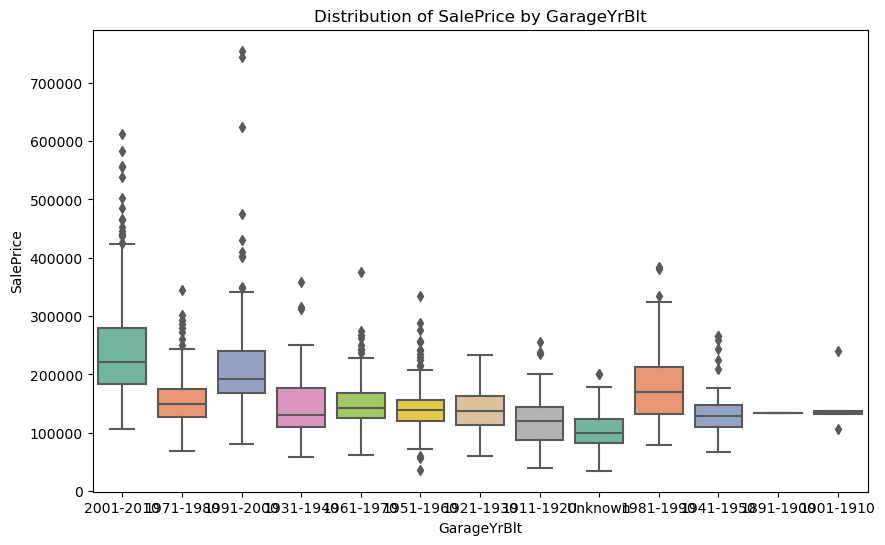

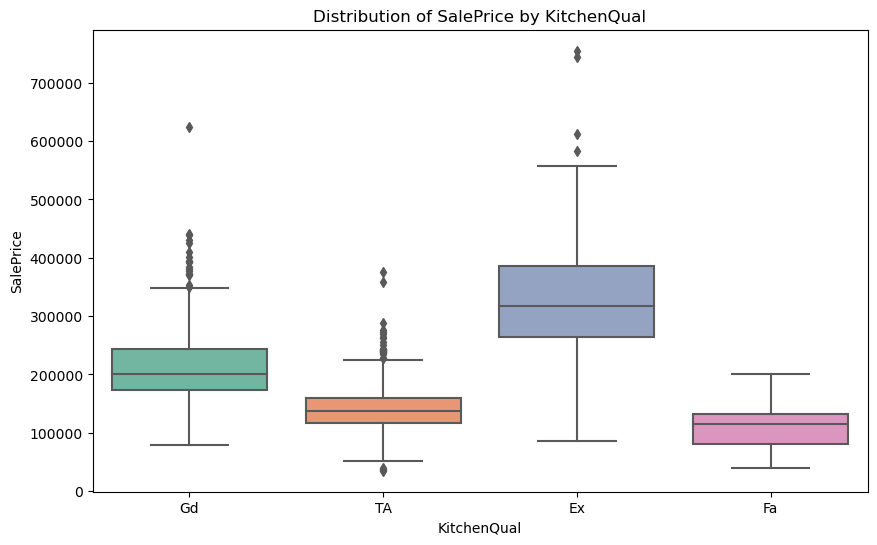

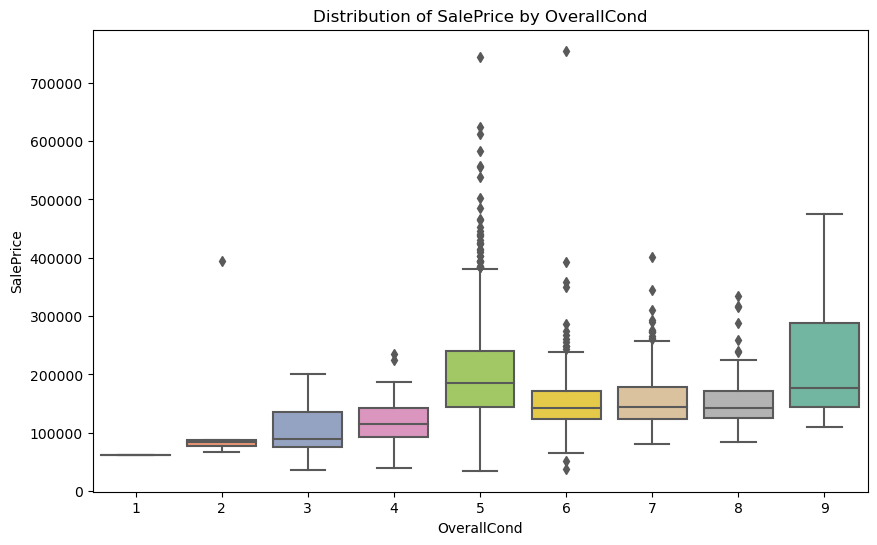

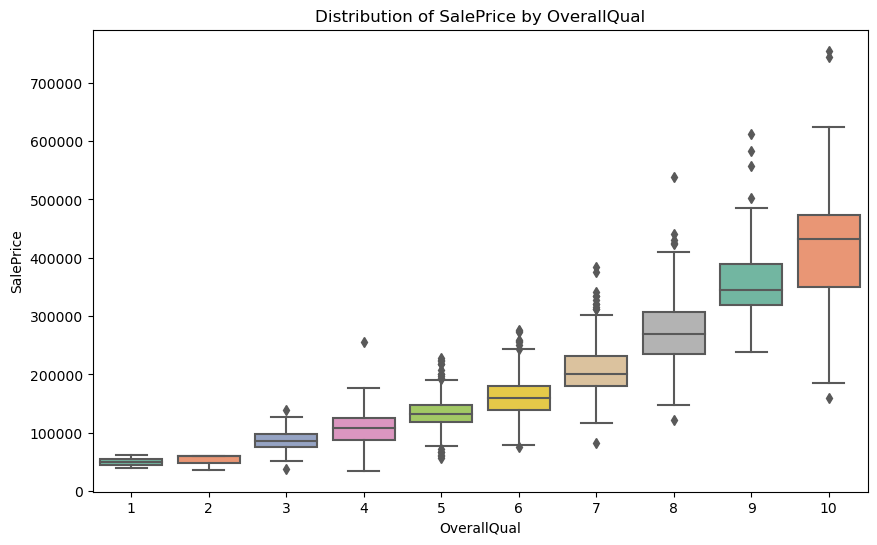

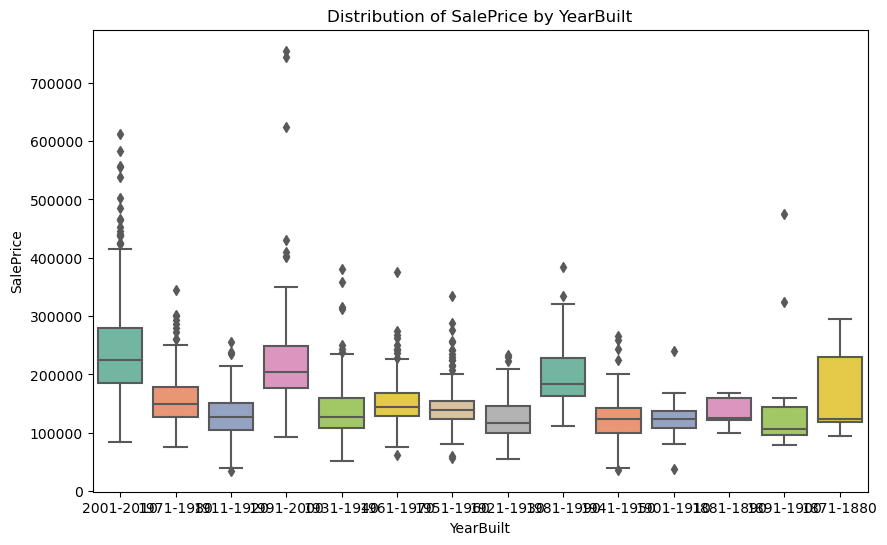

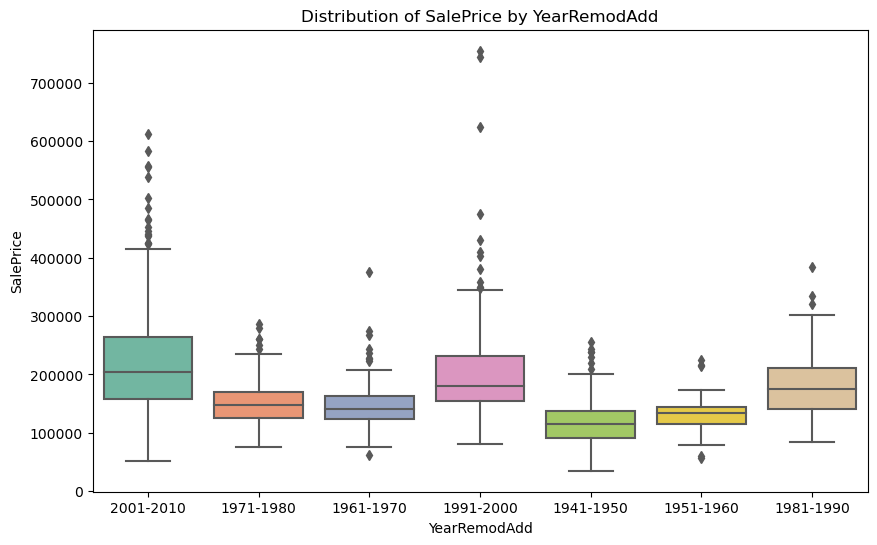

In [17]:
# plot all categorical values vs sales price
target_variable = 'SalePrice'
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=category, y=target_variable, data=df, palette="Set2")
    plt.title(f'Distribution of {target_variable} by {category}')
    plt.xlabel(category)
    plt.ylabel(target_variable)
    plt.show()

***Conclusion:***

- We can observe the variation of means of 'SalePrice' from one category to another for most features. We can say that Categorical variables are correlated with the target.
- Not surprisingly, the overall quality assessment present the clearest correlation with the sale price.

## Numerical vs Target
- Correlation matrix identifies features which correlate strongly with each other
- We are particularly interested in correlation with SalePrice
- Higly colinear features can be identified, which can lead to overfitting.

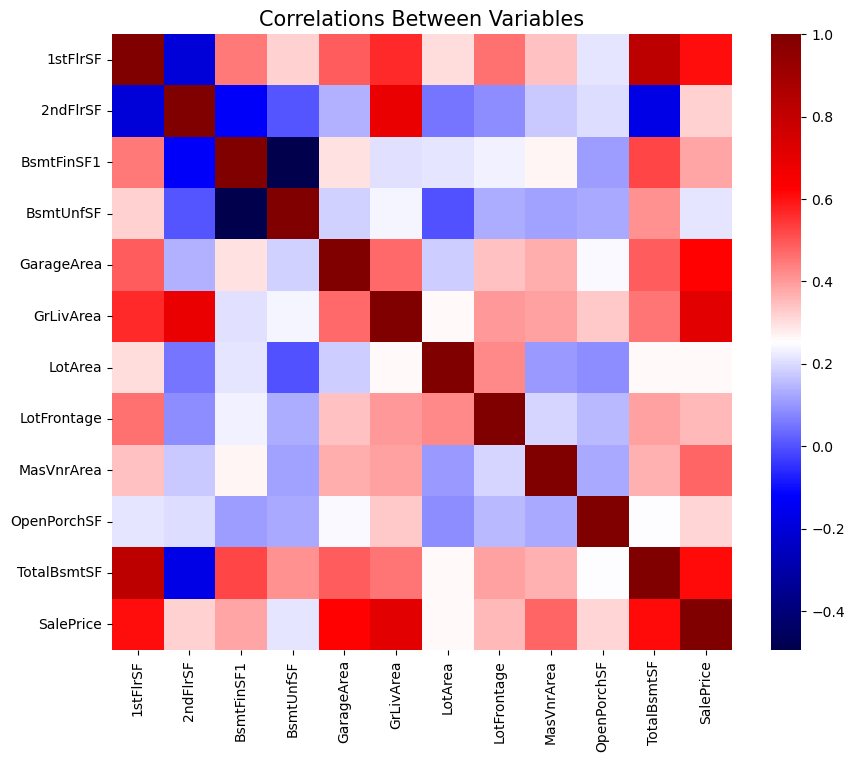

In [18]:
# correlation matrix between variable
plt.figure(figsize=(10,8))
sns.heatmap(df[numerics].corr(), cmap='seismic')
plt.title("Correlations Between Variables", size=15)
plt.show()

***Conclusion:***

- We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method, which is the default value of parameter "method" in corr() function.
- No strongly covariant variables identified (features describing the same house property, such as TotalBsmtSF and 1stFlSF)

In [19]:
important_num_cols = list(df[numerics].corr()["SalePrice"][(df[numerics].corr()["SalePrice"]>0.50) | (df[numerics].corr()["SalePrice"]<-0.50)].index)

In [20]:
important_num_cols

['1stFlrSF', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'SalePrice']

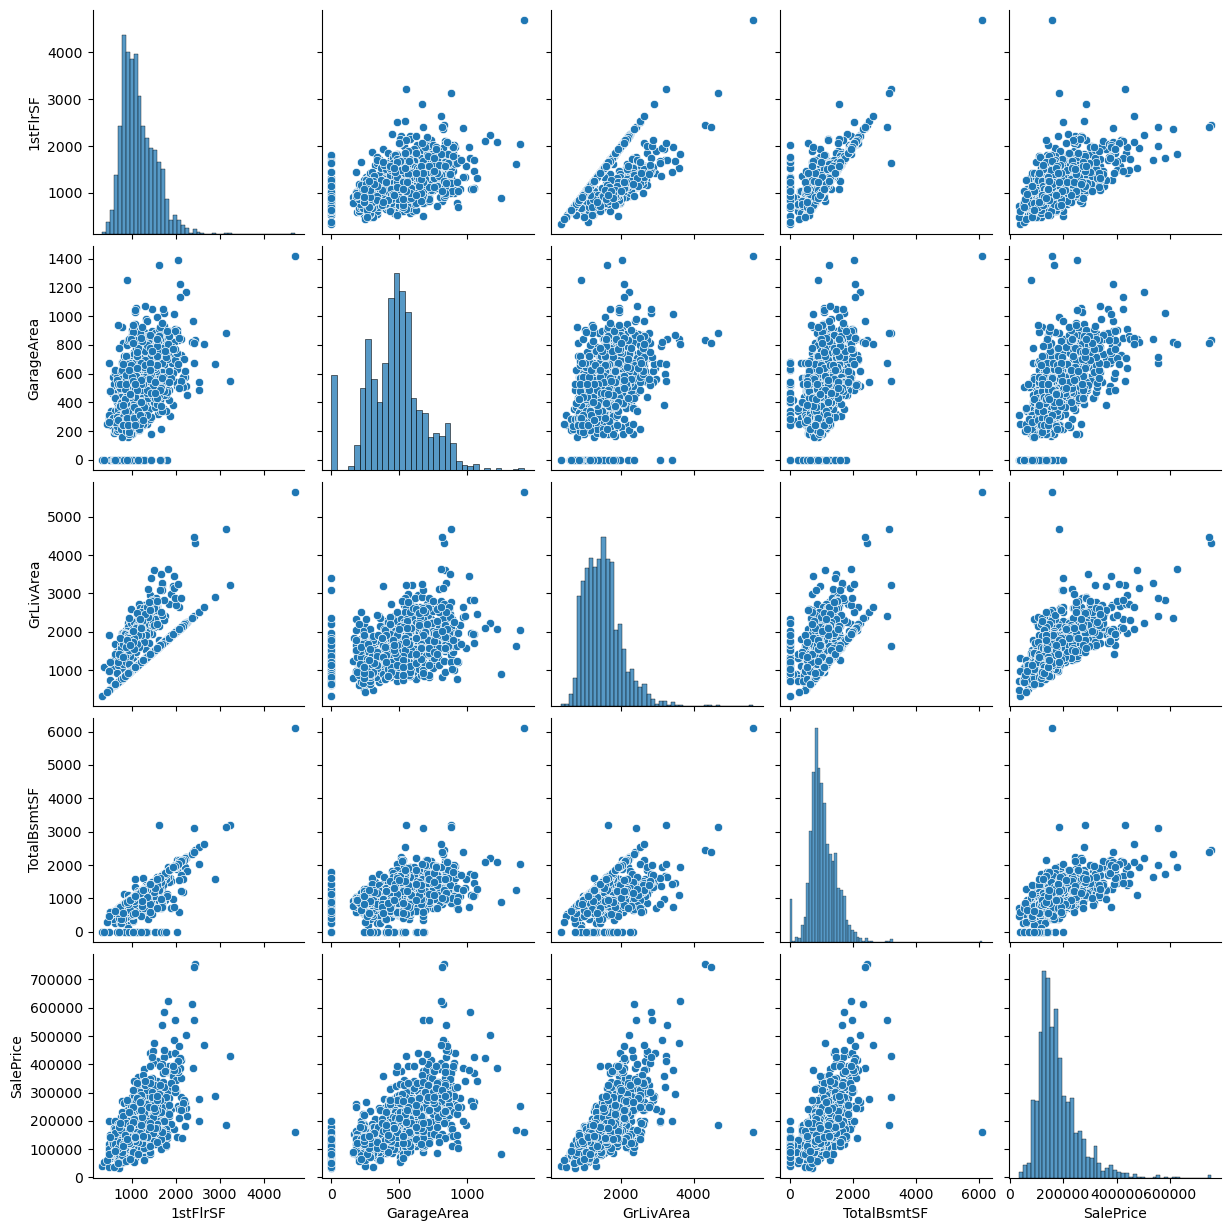

In [21]:
sns.pairplot(df[important_num_cols])

***Conclusion:***

- The pair plot shows some linear correlations, but they are not very strong.

# III. Data Preparation:

In [22]:
# selected columns
important_num_cols.remove('SalePrice')
important_cols = important_num_cols + categories + ['SalePrice']
df = df[important_cols]

In [23]:
df.shape

(1460, 15)

## 1. Handling Null Values:

In [24]:
# ratio of Nans
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

GarageFinish    0.110959
BsmtFinType1    0.078082
BedroomAbvGr    0.067808
1stFlrSF        0.000000
GarageArea      0.000000
GrLivArea       0.000000
TotalBsmtSF     0.000000
BsmtExposure    0.000000
GarageYrBlt     0.000000
KitchenQual     0.000000
OverallCond     0.000000
OverallQual     0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
SalePrice       0.000000
dtype: float64

***Note:***

We will come back to deal with null values once we complete the other preprocessing steps.

## 3. Encoding
- categorical values will be encoded to integers

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
columns_to_encode = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual','GarageYrBlt','YearBuilt','YearRemodAdd']

In [27]:
for column in columns_to_encode:
    print(df[column].value_counts(),end="\n \n")

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
 
Unf     396
GLQ     385
ALQ     202
BLQ     136
Rec     126
LwQ      70
None     31
Name: BsmtFinType1, dtype: int64
 
Unf     546
RFn     366
Fin     313
None     73
Name: GarageFinish, dtype: int64
 
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
 
2001-2010    375
1991-2000    207
1961-1970    186
1971-1980    181
1951-1960    146
1981-1990     96
Unknown       81
1941-1950     65
1931-1940     47
1921-1930     45
1911-1920     25
1901-1910      5
1891-1900      1
Name: GarageYrBlt, dtype: int64
 
2001-2010    364
1961-1970    182
1991-2000    175
1971-1980    174
1951-1960    164
1941-1950     81
1921-1930     76
1911-1920     71
1931-1940     63
1981-1990     63
1901-1910     22
1891-1900     14
1871-1880      6
1881-1890      5
Name: YearBuilt, dtype: int64
 
2001-2010    497
1991-2000    285
1941-1950    178
1971-1980    159
1961-1970    149
1951-1960    106
19

### encode features one by one

In [28]:
# BsmtExposure column
encBsmtExposure = LabelEncoder()
df['BsmtExposure'] = encBsmtExposure.fit_transform(df['BsmtExposure'].astype(str))
encBsmtExposure.inverse_transform(np.array([0,1,2,3,4]))

array(['Av', 'Gd', 'Mn', 'No', 'None'], dtype=object)

In [29]:
# BsmtFinType1 column
encBsmtFinType1 = LabelEncoder()
df['BsmtFinType1'] = encBsmtFinType1.fit_transform(df['BsmtFinType1'].astype(str))
encBsmtFinType1.inverse_transform(np.array([0,1,2,3,4,5,6,7]))

array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf', 'nan'],
      dtype=object)

In [30]:
# convert integer back to np.nan
def back_to_nan(row):
    if row == 7:
        return np.nan
    return int(row)

# convert the column
df['BsmtFinType1'] = df['BsmtFinType1'].apply(back_to_nan)

In [31]:
# GarageFinish column
encGarageFinish = LabelEncoder()
df['GarageFinish'] = encGarageFinish.fit_transform(df['GarageFinish'].astype(str))
encGarageFinish.inverse_transform(np.array([0,1,2,3,4]))

array(['Fin', 'None', 'RFn', 'Unf', 'nan'], dtype=object)

In [32]:
# convert integer back to np.nan
def back_to_nan(row):
    if row == 4:
        return np.nan
    return int(row)

# convert the column
df['GarageFinish'] = df['GarageFinish'].apply(back_to_nan)

In [33]:
# KitchenQual column
encKitchenQual = LabelEncoder()
df['KitchenQual'] = encKitchenQual.fit_transform(df['KitchenQual'].astype(str))
encKitchenQual.inverse_transform(np.array([0,1,2,3]))

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

In [34]:
# GarageYrBlt column
encGarageYrBlt = LabelEncoder()
df['GarageYrBlt'] = encGarageYrBlt.fit_transform(df['GarageYrBlt'].astype(str))
encGarageYrBlt.inverse_transform(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12]))

array(['1891-1900', '1901-1910', '1911-1920', '1921-1930', '1931-1940',
       '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990',
       '1991-2000', '2001-2010', 'Unknown'], dtype=object)

In [35]:
# YearBuilt column
encYearBuilt = LabelEncoder()
df['YearBuilt'] = encYearBuilt.fit_transform(df['YearBuilt'].astype(str))
encYearBuilt.inverse_transform(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13]))

array(['1871-1880', '1881-1890', '1891-1900', '1901-1910', '1911-1920',
       '1921-1930', '1931-1940', '1941-1950', '1951-1960', '1961-1970',
       '1971-1980', '1981-1990', '1991-2000', '2001-2010'], dtype=object)

In [36]:
# YearRemodAdd column
encYearRemodAdd = LabelEncoder()
df['YearRemodAdd'] = encYearRemodAdd.fit_transform(df['YearRemodAdd'].astype(str))
encYearRemodAdd.inverse_transform(np.array([0,1,2,3,4,5,6]))

array(['1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990',
       '1991-2000', '2001-2010'], dtype=object)

In [37]:
df.head()

,1stFlrSF,GarageArea,GrLivArea,TotalBsmtSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,KitchenQual,OverallCond,OverallQual,YearBuilt,YearRemodAdd,SalePrice
0,856,548,1710,856,3.0,3,2.0,2.0,11,2,5,7,13,6,208500
1,1262,460,1262,1262,3.0,1,0.0,2.0,8,3,8,6,10,3,181500
2,920,608,1786,920,3.0,2,2.0,2.0,11,2,5,7,13,6,223500
3,961,642,1717,756,NaN,3,0.0,3.0,10,2,5,7,4,2,140000
4,1145,836,2198,1145,4.0,0,2.0,2.0,10,2,5,8,12,5,250000


In [38]:
df.isna().sum()

1stFlrSF          0
GarageArea        0
GrLivArea         0
TotalBsmtSF       0
BedroomAbvGr     99
BsmtExposure      0
BsmtFinType1    114
GarageFinish    162
GarageYrBlt       0
KitchenQual       0
OverallCond       0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
SalePrice         0
dtype: int64

## 4. Imputation
- replace missing values with the most common value in the feature

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
columns_to_impute = ['BedroomAbvGr', 'BsmtFinType1', 'GarageFinish']  # cols with missing values

# imputer and method
imputer = SimpleImputer(strategy='most_frequent')

# transform the dataframe
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])
joblib.dump(imputer, "imputer.save")

['imputer.save']

In [41]:
# confirm nans
df.isna().sum()

1stFlrSF        0
GarageArea      0
GrLivArea       0
TotalBsmtSF     0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinType1    0
GarageFinish    0
GarageYrBlt     0
KitchenQual     0
OverallCond     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

## 5. Standardization
- standard scaler substract the mean and divides by standard deviation.

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
df[important_num_cols] = scaler.fit_transform(df[important_num_cols])

## 6.Data type Conversion:
- convert BedroomAbvGr, BsmtFinType1, GarageFinish from float to integer features. 

In [44]:
df['BedroomAbvGr']= df['BedroomAbvGr'].astype(int)
df['BsmtFinType1']= df['BsmtFinType1'].astype(int)
df['GarageFinish']= df['GarageFinish'].astype(int)

In [45]:
df.head()

,1stFlrSF,GarageArea,GrLivArea,TotalBsmtSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,KitchenQual,OverallCond,OverallQual,YearBuilt,YearRemodAdd,SalePrice
0,-0.793434,0.351000,0.370333,-0.459303,3,3,2,2,11,2,5,7,13,6,208500
1,0.257140,-0.060731,-0.482512,0.466465,3,1,0,2,8,3,8,6,10,3,181500
2,-0.627826,0.631726,0.515013,-0.313369,3,2,2,2,11,2,5,7,13,6,223500
3,-0.521734,0.790804,0.383659,-0.687324,3,3,0,3,10,2,5,7,4,2,140000
4,-0.045611,1.698485,1.299326,0.199680,4,0,2,2,10,2,5,8,12,5,250000


## 7. Train-Test split:

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# X are features, y is target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [48]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# IV. Modeling & Evaluation:
- identify best regression model